# Exploritary Data Analysis

1. Basics
2. Missing Values
3. Outliers
4. Distribution
5. Correlation


In [1]:
import pandas as pd
import plotly.express as px
train = pd.read_csv('train_house_prices.csv')
test = pd.read_csv('test_house_prices.csv')
categorical_features = train.select_dtypes(include=["object"])
numeric_features = train[train.columns[train.dtypes != "object"]]

## 1. Basics

* Number of rows
* Number of columns

In [2]:
# shape(rows, columns)
print(f'Shape of train data = {train.shape}')
print(f'Shape of test data = {test.shape}')

Shape of train data = (1460, 81)
Shape of test data = (1459, 80)


## 2. Distribution

Distributions are being used to check the distribution of the data. 
Different Distributions:
* Discrete distribution: binomial or Poisson
* Coninuous distribution: Normal or unifrom
* Multivariate distribution: Multivariate normal or Multinomial
* Univariate distribution: Normal or exponential
* Exponential family distributions
* heavy-tailed distributions: Student's t-distribution, Cauchy or Pareto
* Skewed distribution: Lognormal or exponential


This is important to check if the data is distributed for the right machine learning algorithms:
* Normal Distribution: Linear regression, logistic regression, linear discriminant analysis (LDA), Gaussian naive Bayes
* Any distribution: Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Neural Network


### 2.1 Normal Distribution of Target Variable

* Normal Distribution and Probability plot of SalePrice

Kurtosis of SalePrice = 6.536281860064529
Skewness of SalePrice = 1.880940746034036


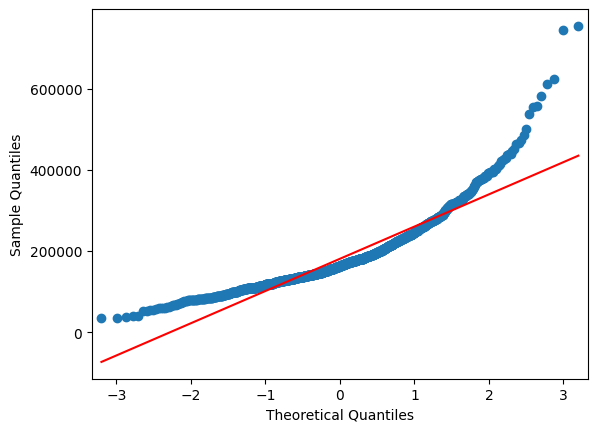

In [3]:
from scipy.stats import skew
import numpy as np
skewness = skew(train['SalePrice'])
kurtosis = train['SalePrice'].kurt()
print(f'Kurtosis of SalePrice = {kurtosis}')
print(f'Skewness of SalePrice = {skewness}')
train['SalePrice'].describe()
fig_1 = px.histogram(train, x="SalePrice",histnorm="probability density")
fig_1.show()
# using statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(train['SalePrice'], line='s').gca().lines

So we have to transform the target variable to make it more normally distributed in Data Preprocessing.

## 3. Correlation

Why check correlation?
* Check if there are features that are highly correlated with the target variable. This improves the performance of a multiple linear regression model, because:
    * The features are then important predictors of the target variable. As a result, the multiple linear regression model will be able to more accurately capture the relationships between the features and the target variable, leading to better predictions of the target variable.
* Check if there is multicollinearity. This means features are highly correlated with each other. This will cause problems:
    * The MLR model will give widly different coefficients
    * Lower the ability to detect significant features
    * Example:
        * x1 and x2 are highly correlated 
        * y = w1*x1 + w2*x2 + b
        * y = 50000*x1 + 100*x2 + b = 100*x1 + 50000*x2 + b
        * The coefficients are very different, but the model is the same. So you will not be able to detect the important features.


* Create correlation map to see which numeric features are correlated with SalePrice

In [4]:
# Pearson's correlatoin
corr = numeric_features.corr(method='pearson')
fig_corr = px.imshow(corr, x=numeric_features.columns, y=numeric_features.columns, color_continuous_scale=px.colors.sequential.Reds)
fig_corr.show()

In [5]:


# Compute the Pearson's correlation coefficient
corr = numeric_features.corr(method="pearson")

# Select the correlations with the target column
target_corr = corr["SalePrice"]

# Create a new DataFrame with the correlations
corr_df = pd.DataFrame(target_corr, numeric_features.columns).sort_values(by="SalePrice", ascending=False)  

corr_df.head(40)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## 4. Missing Values, Unusual Features and Data Types

### 4.1 Check Missing Values

* Make a table of the data types, amount of null values (Checking Missing Values) and description of all the features

In [6]:
def Visualize_NA(df, s):
    d_t = df.dtypes
    n_v = df.isnull().sum()
    f_n = df.columns
    p_n_v = (n_v/df.shape[0])*100
    df_dt_nul_per = pd.DataFrame({'Features':f_n,'Data Types': d_t, 'Null Values': n_v, 'Percentage Null Values': p_n_v})
    df_dt_nul_per = df_dt_nul_per.sort_values(by='Null Values', ascending=False)
    if s == 1:
        return df_dt_nul_per
    else:
        df_dt_nul_per.drop('Features', inplace=True, axis=1)
        df_dt_nul_per = df_dt_nul_per[df_dt_nul_per['Null Values'] > 0]
        return df_dt_nul_per

Visualize_NA(train,0).head(40)

,Data Types,Null Values,Percentage Null Values
PoolQC,object,1453,99.520548
MiscFeature,object,1406,96.301370
Alley,object,1369,93.767123
Fence,object,1179,80.753425
FireplaceQu,object,690,47.260274
LotFrontage,float64,259,17.739726
GarageYrBlt,float64,81,5.547945
GarageCond,object,81,5.547945
GarageType,object,81,5.547945
GarageFinish,object,81,5.547945


* Visualize Missing Values

In [7]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(Visualize_NA(train,1), x= 'Features', y= 'Null Values', color= 'Null Values', color_continuous_scale=px.colors.sequential.Plasma_r,height=400,)
fig.show()

* Heatmap of Missing Values

In [8]:
null_counts = train.isnull()
fig_heatmap = px.imshow(null_counts, x=train.columns, y=train.index, color_continuous_scale=px.colors.sequential.Reds)
fig_heatmap.show()

### 4.2 Delete Unusual Features

* Check for unusual features

In [9]:
nunique = train.nunique()
nunique = nunique[nunique.values < 3]
for i in range(len(nunique)):
    print(train[f'{nunique.index[i]}'].describe())


count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object


* Delete Unusual Features by hand

In [10]:
train = train.drop(labels=['Utilities', 'Street'], axis=1) 
print(f'Shape of train data = {train.shape}')

Shape of train data = (1460, 79)


### 4.3 Fix Data Types

* Check if there are any features with wrong data types:
    * Numerical features that actually are categorical
    * Categorical features that actually are numerical
* Check which numerical features has a small number of unique values and read there description to see if they are actually categorical.
* Year features are numerical but they are actually categorical, expect if they are linearly correlated with SalePrice
* Postcode is numerical but it is actually categorical, because a higher postcode is not a higher value.

In [11]:
numeric_features_fix = train[train.columns[train.dtypes != "object"]]
n_data_types = numeric_features_fix.dtypes
features_names_fix = numeric_features_fix.columns
unique_values_fix = numeric_features_fix.nunique()
data_type_fix = pd.DataFrame({'Feature': features_names_fix,'Data Types': n_data_types, 'Unique Values': unique_values_fix}).sort_values(by='Unique Values', ascending=True)
data_type_fix.head(40)

,Feature,Data Types,Unique Values
BsmtHalfBath,BsmtHalfBath,int64,3
HalfBath,HalfBath,int64,3
FullBath,FullBath,int64,4
BsmtFullBath,BsmtFullBath,int64,4
Fireplaces,Fireplaces,int64,4
KitchenAbvGr,KitchenAbvGr,int64,4
GarageCars,GarageCars,int64,5
YrSold,YrSold,int64,5
BedroomAbvGr,BedroomAbvGr,int64,8
PoolArea,PoolArea,int64,8


In [12]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

* YrSold is a year numerical
* MoSold is a month numerical
* MSSubClass is a categorical, because 190 is not better than 20

* YearBuilt, YearRemodAdd and GarageYrBlt are linear collinear with SalePrice. So they stay numerical.

In [13]:
for col in ['YrSold', 'MoSold', 'MSSubClass']:
    train[col] = train[col].astype(str)

### 4.3 Imputing Missing Values

In [14]:
def handleNA(df):
    df['MiscFeature'].fillna(value='None',inplace=True)
    df['Alley'].fillna(value='No alley access',inplace=True)    
    df['BsmtQual'].fillna(value='No Basement',inplace=True)
    df['BsmtCond'].fillna(value='No Basement',inplace=True)
    df['BsmtExposure'].fillna(value='No Basement',inplace=True)
    df['BsmtFinType1'].fillna(value='No Basement',inplace=True)    
    df['BsmtFinType2'].fillna(value='No Basement',inplace=True)    
    df['FireplaceQu'].fillna(value='No Fireplace',inplace=True)    
    df['GarageType'].fillna(value='No Garage',inplace=True)  
    df['GarageYrBlt'].fillna(value=0,inplace=True)
    df['GarageFinish'].fillna(value='No Garage',inplace=True)
    df['GarageQual'].fillna(value='No Garage',inplace=True)
    df['GarageCond'].fillna(value='No Garage',inplace=True)
    df['MasVnrType'].fillna(value='None',inplace=True)
    df['MasVnrArea'].fillna(value=0.0,inplace=True)
    df['PoolQC'].fillna(value='No Pool',inplace=True)    
    df['Fence'].fillna(value='No Fence',inplace=True)
def meanNA(df, s):
    df[s].fillna(value=df[s].mean(),inplace=True)
    
def most_frequentNA(df, s):
    df[s].fillna(value=df[s].value_counts().idxmax(),inplace=True)

* Replace with 0

In [15]:
handleNA(train)

* **LotFrontage**: Linear feet of street connected to property. Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.

In [16]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

* **Electrical**: Replace with the most frequent value

In [17]:
most_frequentNA(train, 'Electrical')

In [18]:
print(f'Shape of data: {train.shape}')
print(f'Count of null values: {train.isnull().sum().sum()}')

Shape of data: (1460, 79)
Count of null values: 0


In [19]:
# Create heatmap with plotly of all the null values in train data   
fig_heatmap = px.imshow(train.isnull(), x=train.columns, y=train.index, color_continuous_scale=px.colors.sequential.Reds)
fig_heatmap.show()

## 5. Outliers

* We will use minimum and maximum threshold to remove the outliers from all the numeric features in training data.
* We will delete every record less than min threshold and more than max threshold.
* Please note that whenever possible its better idea to use outliers for analysis and prediction, to make makes the model more robust. Because in the real world we will always encounter the outliers!


TypeError: unsupported operand type(s) for -: 'str' and 'str'

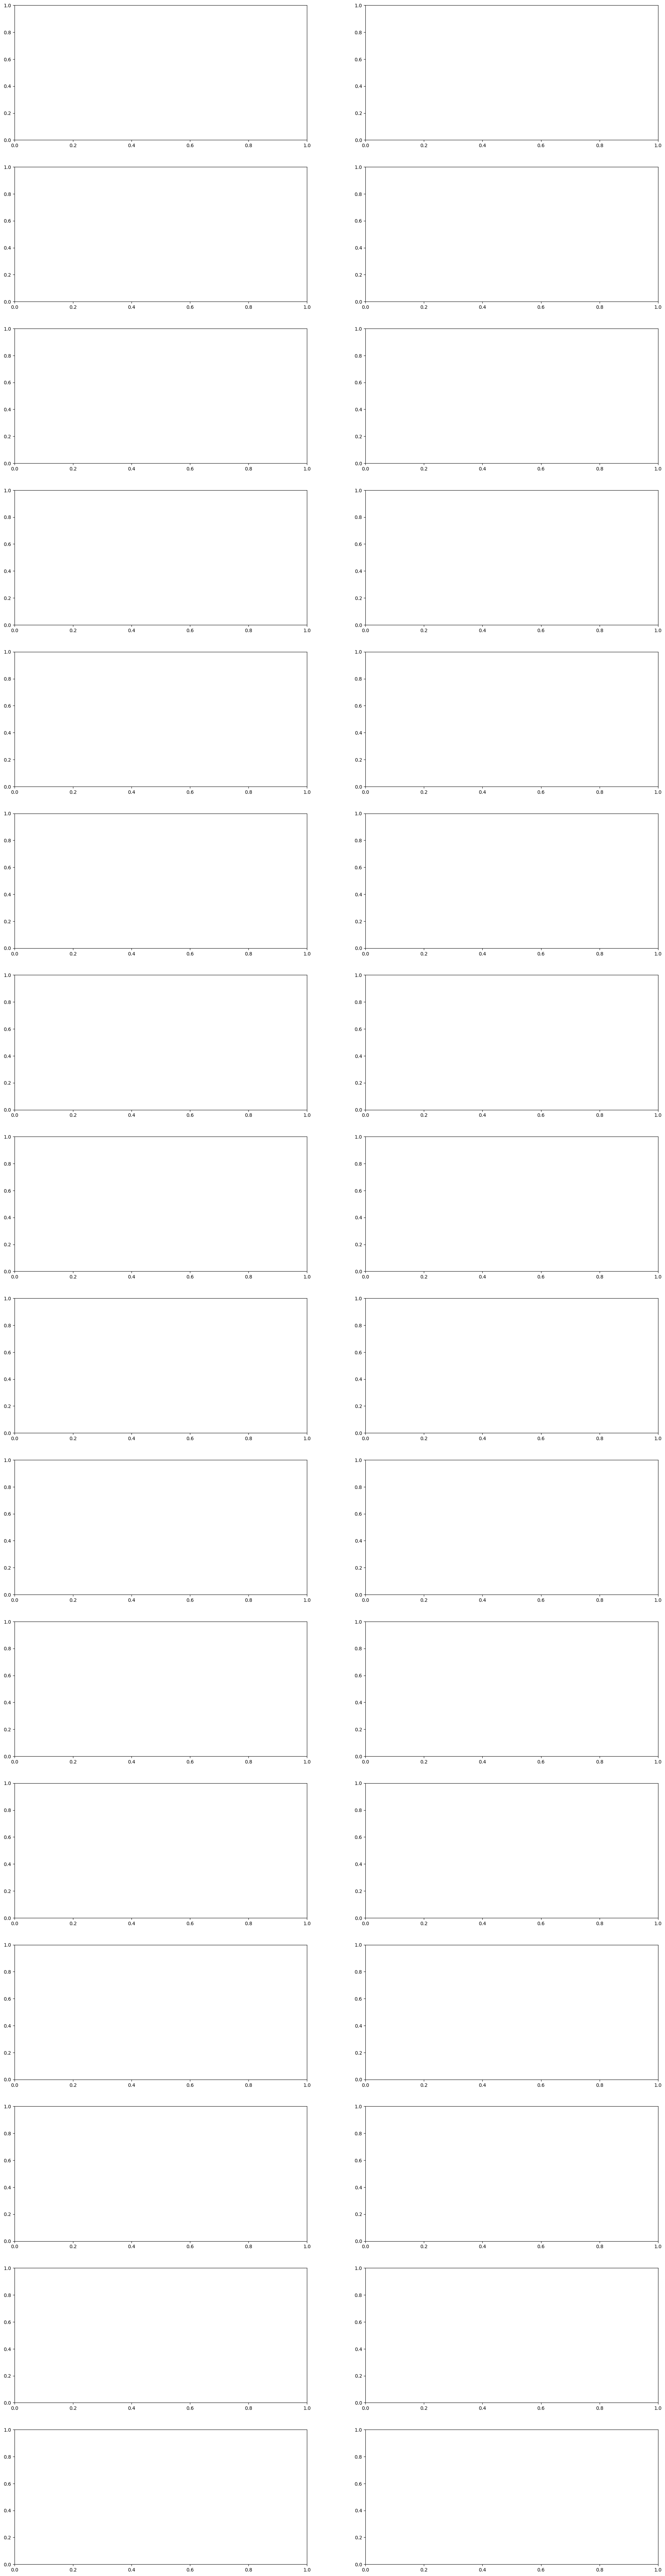

In [22]:
import matplotlib.pyplot as plt
min_percentile= 0.001
max_percentile= 0.999
# Use numeric features
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
target= 'SalePrice'
nrows= int(np.ceil(len(features)/2))
ncols= 2 

def detect_and_remove_outliers(inline_delete= True):
    global train
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))
    outliers = []
    cnt = 0
    for row in range (0, nrows):
        for col in range (0, ncols):
            # df_outliers = outlier_detection_using_percentile(features[cnt])
            # Outlier detection using percentile
            min_thresold, max_thresold = train[features[cnt]].quantile([min_percentile, max_percentile])
            # print(f'outlier_detection_using_percentile()> min_thresold: {min_thresold}, max_thresold: {max_thresold}')
            # print (f'No of outliers below min_thresold: {len(train[train[feature] < min_thresold])}')
            # print (f'No of outliers above max_thresold: {len(train[train[feature] > max_thresold])}')
            df_outliers = train[(train[features[cnt]] < min_thresold) | (train[features[cnt]] > max_thresold)]

            # Updaing list of outliers
            outliers = outliers + df_outliers.index.tolist()

            # Plot feature vs target using scatter plot
            ax[row][col].scatter(x = train[features[cnt]], y= train[target])
     
            # Mark outlier records in same scatter plot
            ax[row][col].scatter(x= df_outliers[features[cnt]],  y=df_outliers[target], marker ="o", edgecolor ="red", s = 100)
            ax[row][col].set_xlabel(features[cnt])
            ax[row][col].set_ylabel(target)
            ax[row][col].set_title('Outlier detection for feature ' + features[cnt])

            if inline_delete: 
                # Drop the outliers inline
                # drop_outliers(df_outliers.index.tolist())
                # print(f'Shape of train data= {train.shape}')
                train = train.drop(df_outliers.index.tolist())
                train.reset_index(drop = True, inplace = True)
                # print(f'Shape of train data= {train.shape}')

            cnt = cnt + 1
            if cnt >= len(features):
                break
    plt.show()

    print(f'outliers: {outliers}')
    unique_outliers= list(set(outliers))
    print(f'unique_outliers: {unique_outliers}')
    
    if inline_delete == False: 
        # Drop the unique outliers from final list
        print(f'Shape of train data= {train.shape}')
        train = train.drop(unique_outliers)
        train.reset_index(drop = True, inplace = True)
        print(f'Shape of train data= {train.shape}')
        
        
detect_and_remove_outliers(inline_delete= False)
